In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

In [45]:
xls = pd.ExcelFile('online_retail_II.xlsx')
df1 = pd.read_excel(xls, 'Year 2009-2010')
df2 = pd.read_excel(xls, 'Year 2010-2011')

In [161]:
df_all = pd.concat([df1, df2], ignore_index=True)
df_all.shape

(1067371, 8)

In [178]:
cancelled_mask = df_all['Invoice'].str.startswith('C', na=False)
df_cancelled = df_all[cancelled_mask]
df = df_all[~cancelled_mask]
print(df_cancelled.shape)
print(df.shape)

(19494, 8)
(1047877, 8)


In [172]:
# https://cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html

In [179]:
df = df[df['Description'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']
df = df.drop(['StockCode', 'Description', 'Customer ID', 'Country', 'Invoice'], axis=1)
df

,Quantity,InvoiceDate,Price
1309,48,2009-12-01 12:57:00,0.21
3548,288,2009-12-02 10:58:00,0.18
4192,3,2009-12-02 12:32:00,0.21
4531,48,2009-12-02 13:20:00,0.21
4543,96,2009-12-02 13:23:00,0.21
...,...,...,...
1060258,48,2011-12-07 15:02:00,0.29
1063701,48,2011-12-08 13:46:00,0.29
1064307,288,2011-12-08 15:03:00,0.21
1065828,48,2011-12-09 08:59:00,0.29


In [180]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate).dt.strftime('%Y-%m-%d')
df = df.groupby('InvoiceDate').sum().reset_index()
df = df.sort_values('InvoiceDate').rename(columns={'InvoiceDate': 'date', 'Quantity': 'y'})
df = df.set_index('date')
df


,y,Price
date,,
2009-12-01,48,0.21
2009-12-02,435,0.81
2009-12-03,56,0.63
2009-12-04,144,0.42
2009-12-05,48,0.21
...,...,...
2011-12-05,205,1.50
2011-12-06,243,1.79
2011-12-07,240,0.87


In [181]:
print(f'Number of rows with missing values: {df.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Train dates : 2009-12-01 --- 2011-11-27  (n=460)
Test dates  : 2011-11-28 --- 2011-12-09  (n=10)


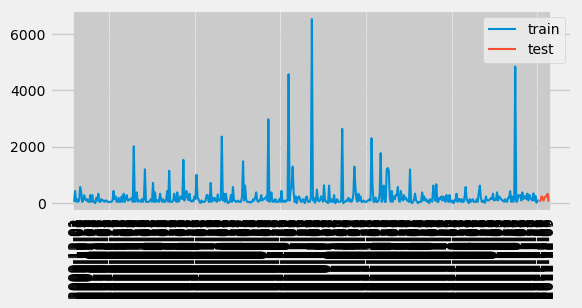

In [190]:
# The last steps data points are used as the test set to evaluate the precitive capacity of the model
steps = 10
data_train = df[:-steps]
data_test  = df[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax = plt.subplots(figsize=(6, 2.5))
# data_train['y'].plot(ax=ax, label='train')
# data_test['y'].plot(ax=ax, label='test')
ax.plot(data_train.index, data_train.y, label='train')
ax.plot(data_test.index, data_test.y, label='test')
plt.xticks(rotation=90)
ax.legend();

### Recursive Autoregressive Forecast

In [191]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [192]:
forecaster = ForecasterAutoreg(
    regressor=RandomForestRegressor(random_state=42),
    lags=10
    )

forecaster.fit(y=data_train['y'])
forecaster

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\skforecast\utils\utils.py:798: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\skforecast\utils\utils.py:798: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=42) 
Lags: [ 1  2  3  4  5  6  7  8  9 10] 
Transformer for y: None 
Transformer for exog: None 
Window size: 10 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 459] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-10-20 18:25:40 
Last fit date: 2023-10-20 18:25:41 
Skforecast version: 0.10.1 
Python version: 3.11.5 
Forecaster id: None 

In [199]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=10)
predictions.head(5)

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\skforecast\utils\utils.py:860: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


10    149.52
11    275.79
12    199.92
13    239.02
14    295.00
Name: pred, dtype: float64

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings s

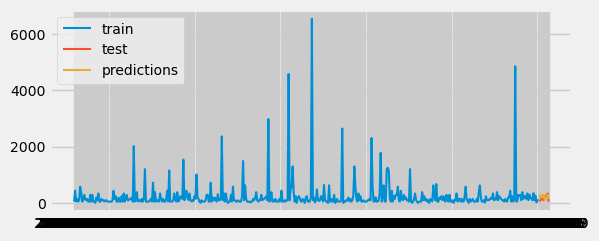

In [200]:
fig, ax = plt.subplots(figsize=(6, 2.5))
# data_train['y'].plot(ax=ax, label='train')
# data_test['y'].plot(ax=ax, label='test')
ax.plot(data_train.index, data_train.y, label='train')
ax.plot(data_test.index, data_test.y, label='test')
ax.plot(data_test.index, predictions, label='predictions')
ax.legend();

In [201]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 10627.69268


In [202]:
# Final Model
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=data_train['y'])

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\skforecast\utils\utils.py:798: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\skforecast\utils\utils.py:798: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


In [203]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=10)

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\skforecast\utils\utils.py:860: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings s

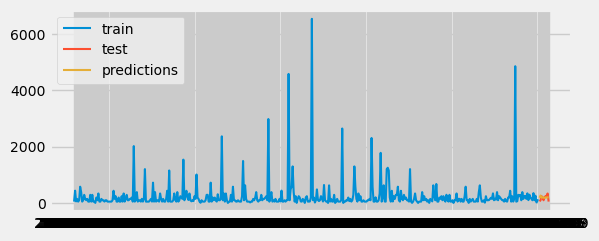

In [209]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 2.5))
# data_train['y'].plot(ax=ax, label='train')
# data_test['y'].plot(ax=ax, label='test')
# predictions.plot(ax=ax, label='predictions')
ax.plot(data_train.index, data_train.y, label='train')
ax.plot(data_test.index, data_test.y, label='test')
ax.plot(data_test.index, predictions, label='predictions')
ax.legend()
plt.tick_params(bottom=False)

In [206]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 9822.544411949024
